In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

time
2023-01-01     5.8
2023-01-02     3.5
2023-01-03     4.0
2023-01-04     6.4
2023-01-05     8.0
              ... 
2023-12-27     9.3
2023-12-28    10.7
2023-12-29    10.4
2023-12-30    10.2
2023-12-31     8.8
Freq: D, Name: tavg, Length: 365, dtype: float64


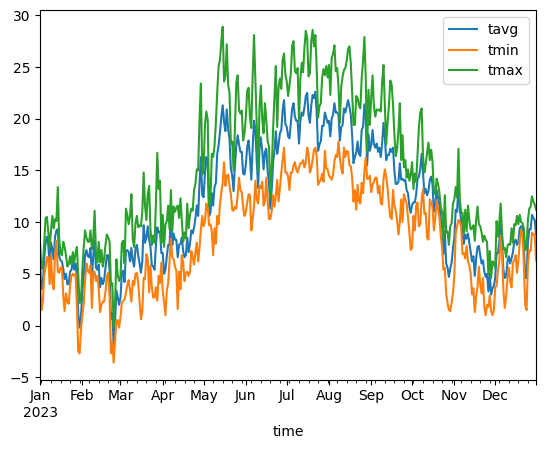

In [4]:
from meteostat import Point, Daily

# Set time period, training nya pake data 2 tahun
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

vancouver = Point(49.2497, -123.1193, 70)

data = Daily(vancouver, start, end)
data = data.fetch()
print(data['tavg'])


data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

#data sudah menjadi dataframe pandas

In [ ]:
#Data Cleaning

import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['merged_weather_marine_data_1jan-29feb.csv'].decode('utf-8')))
print(data.describe())

#column temperature (min, max, avg), precipitation, snow, wind(speed, direction, peak gust), pressure, sunshine duration
print(data.columns)

#melihat info descriptive statistic
print(data.describe())

#melihat banyaknya missing value
print(data.isnull().sum())

#melihat banyaknya entri unique
print(data.nunique())

# Menentukan kolom-kolom yang bertipe object
object_cols = data.select_dtypes(include=['object']).columns
df = data.drop(columns=object_cols)

# df = df.dropna()   #58 row is dropped
#df['sail_decision'] = 1
print(df.columns)
print(df.shape)

       temperature_2m (°C)  relative_humidity_2m (%)  dew_point_2m (°C)  \
count          1440.000000               1440.000000        1440.000000   
mean             27.113542                 85.305556          24.308750   
std               1.999761                  9.606488           0.665255   
min              23.100000                 59.000000          21.700000   
25%              25.400000                 77.000000          23.900000   
50%              26.700000                 88.000000          24.300000   
75%              28.800000                 94.000000          24.800000   
max              31.800000                 99.000000          26.200000   

       apparent_temperature (°C)  precipitation (mm)    rain (mm)  \
count                1440.000000         1440.000000  1440.000000   
mean                   32.286944            0.388056     0.388056   
std                     2.221935            1.015233     1.015233   
min                    27.400000            0.00

In [ ]:
#Feature Engineering
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

print(data_scaled.shape)

#turn into sequence
steps= 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])

print(len(inp)) #input panjangnya 210, output panjangnya 20
# # print(inp)

inp= np.asanyarray(inp)
out= np.asanyarray(out)

print(inp.shape)
print(out.shape)

train_test_ratio = 0.7
train_size = int(train_test_ratio * data_scaled.shape[0])
print(train_size)

#180 data for train, 30 data for test
x_train = inp[:train_size,:,:]
x_test = inp[train_size:,:,:]
y_train = out[:train_size]
y_test= out[train_size:]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1440, 36)
1420
(1420, 20, 36)
(1420, 36)
1007
(1007, 20, 36)
(413, 20, 36)
(1007, 36)
(413, 36)


1. Architecture Kode Dibawah

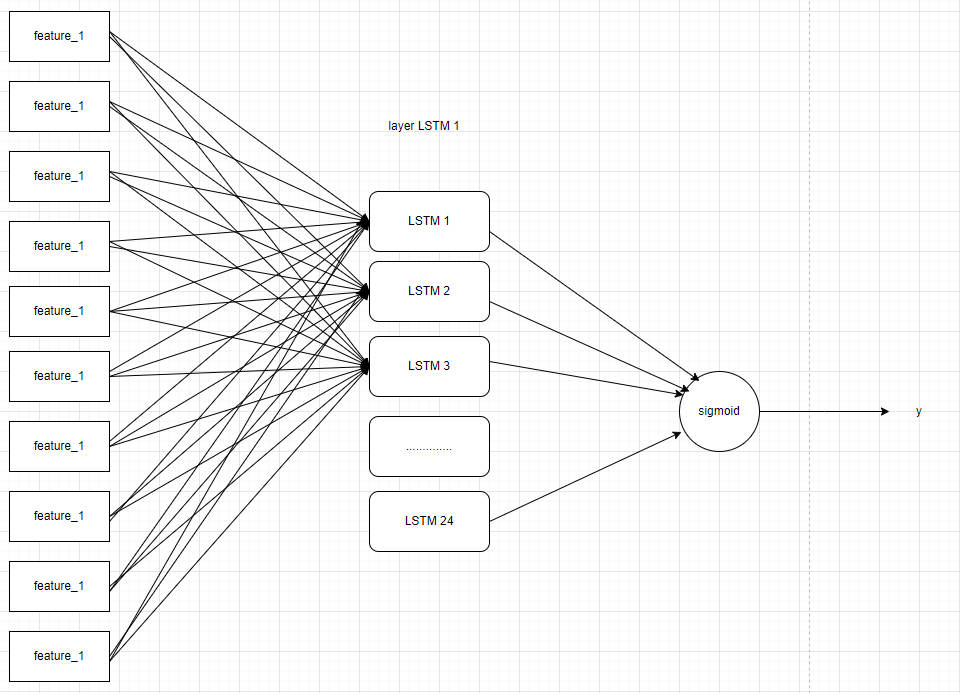

In [ ]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

weather_model = tf.keras.Sequential()
weather_model.add(tf.keras.layers.LSTM(38, input_shape=(x_train.shape[1], x_train.shape[2])))  # 64 unit LSTM
weather_model.add(tf.keras.layers.Dense(8)) #kalau mau ngecek akurasi forecast, comment line dibawah
weather_model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #sigmoid menyebabkan output menjadi 1/0

weather_model.compile(optimizer='adam', loss='mean_squared_error')
weather_model.summary()

weather_model.fit(x_train,y_train,epochs=200, verbose=1)

y_pred = weather_model.predict(x_test)
print("Predicted Value",y_pred[2][0])
print("Expected Value",y_test[2][0])

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 38)                7144      
                                                                 
 dense_9 (Dense)             (None, 8)                 312       
                                                                 
Total params: 7456 (29.12 KB)
Trainable params: 7456 (29.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 2s 10ms/step - loss: 0.1443
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0628
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0416
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0355
Epoch 6/200
6/6 [=======

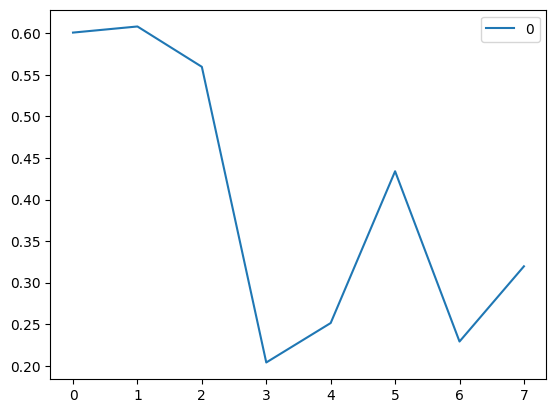

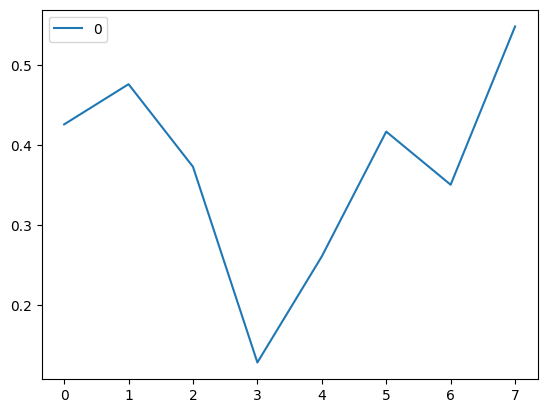

In [ ]:
import pandas as pd

tests = y_test[0]
test_df = pd.DataFrame(tests)
test_df.plot()
plt.show()


preds = y_pred[0]
pred_df = pd.DataFrame(preds)
pred_df.plot()
plt.show()